Entrenamiento del Modelo

In [0]:
# Configura el acceso a Azure Data Lake Storage (ADLS)
account = "stmd01estrella"
key = "aO0SDuNHT7RQFaCaMN+YiW2R5829YhVT2GtOey+Utaw611i/J+b300eZMYSAfVbNeMz8U/X94aVC+AStgeMROw=="

spark.conf.set(f"fs.azure.account.key.{account}.dfs.core.windows.net", key)


In [0]:
# Ruta al archivo Excel en ADLS
excel_path = "abfss://miscelanea@stmd01estrella.dfs.core.windows.net/mi_archivo.xlsx"


Cargo los datos de entrenamiento

In [0]:
from pyspark.sql import SparkSession

# Configura Spark
spark = SparkSession.builder \
    .appName("ExcelReader") \
    .getOrCreate()

# Ruta al archivo Excel en DBFS
dbfs_file_path = "dbfs:/Workspace/mi_archivo.xlsx"

# Lee el archivo Excel
df = spark.read.format("com.crealytics.spark.excel") \
    .option("dataAddress", "'Sheet1'!A1") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(dbfs_file_path)

# Muestra el contenido del DataFrame
df.show()


+----+----------+---------+----------+-------+----------+---------+-----------+----------+----------+----------+----------------+-------------+-----+-------+--------+----------+---------+---------+----------+-------------+----------+---------+-------+----------+------------+-------------+-------------+-----+----------+----------+------+-----------------+-------------------+--------------------+------------------+-------------------+---+------------------+-----+------------------+------------------+--------------------+
|FID0|  Alt_mean|Rango_alt|Slope_mean|Or_0N1S| bio1_mean|bio7_mean| bio12_mean|bio15_mean|bio18_mean|bio19_mean|       suma_rios|    dist_rios|bsq_.|cultv_.|cmpnat_.|vegInunl_.|slodesn_.|cpoagua_.|   den_pob|   dis_ciudad|dis_carret|dengue_SA|Aegypti|albopictus|      DenEsp|       AegEsp|       AlbEsp|FID28|  OrientNS|   OrienEO| FID31|              BSQ|                CMP|                 CPA|              CULT|                SLD|SLU|               VGI|FID39|         d

In [0]:
display(df)

FID0 Alt_mean Rango_alt Slope_mean Or_0N1S bio1_mean bio7_mean bio12_mean bio15_mean bio18_mean bio19_mean suma_rios dist_rios bsq_. cultv_. cmpnat_. vegInunl_. slodesn_. cpoagua_. den_pob dis_ciudad dis_carret dengue_SA Aegypti albopictus DenEsp AegEsp AlbEsp FID28 OrientNS OrienEO FID31 BSQ CMP CPA CULT SLD SLU VGI FID39 dengue_TS aegypti_TS albopictus_TS 0.0 6.894737 59.0 0.002311 0.0 288.866667 115.0667 320.133333 113.2 27.333333 22.866667 null 275261.6875 0.0 0.06 0.1707 0.0 0.0 99.7703 20.576849 84693.5625 1000.0 0.0 0.0 0.0 56.205118755 -26.870102846 -19.093309115 0.0 113.090397 35.267908 1235.0 39.06172839506173 7.743827160493828 0.0 53.19444444444444 0.0 0.0 0.0 0.0 0.531683677084068 0.3277185790666374 0.004812383222184509 1.0 32.059445 275.0 0.143713 0.0 285.450609 110.3329 280.694181 105.913396 33.400541 21.633288 22757.34925046 285602.875 0.03 5.45 9.9472 0.0186 0.0776 84.4755 20.576944 117592.515625 0.0 0.0 0.0 0.0 55.154667701 -26.566496063 -19.073740272 1.0 109.830622 38.562617 1236.0 46.96296296296296 14.32407407407407 0.8611111111111112 37.76234567901235 0.08950617283950617 0.0 0.0 1.0 0.5202018073526902 0.3077834756756661 0.003943167217366677 2.0 51.054769 251.0 0.232077 0.0 279.985104 107.4638 331.640516 92.968222 50.170804 29.194638 22757.34925046 245904.453125 0.39 15.78 10.8535 0.0652 0.0 72.9112 20.576805 118207.445313 0.0 0.0 0.0 0.0 54.122950901 -26.261889255 -19.037202836 2.0 83.593517 57.064106 1237.0 60.88271604938272 11.73456790123457 0.4814814814814815 26.09567901234568 0.4907407407407408 0.0 0.3148148148148148 2.0 0.5104524987351181 0.289492093475998 0.003291792614927803 3.0 1.0 0.0 1.99E-4 0.0 286.2 123.6 441.6 109.4 53.2 25.0 null 199541.96875 0.0 0.0 0.0 0.0 0.0 100.0 null 21000.0 1000.0 0.0 0.0 0.0 56.088236024 -26.547508023 -18.791244131 3.0 126.789746 61.37171 1238.0 25.67901234567901 56.03703703703704 0.03703703703703703 17.66358024691358 0.0154320987654321 0.0 0.2253086419753086 3.0 0.4735768767735607 0.3201660763812782 0.00573165980499711 4.0 20.146231 78.0 0.094646 0.0 289.310627 119.5604 411.758401 96.117166 55.415985 27.167121 30985.6853309743 247757.953125 0.0 7.43 18.1906 0.0528 0.0466 74.2737 30.64135 39115.214844 0.0 0.0 1.0 0.0 55.028253504 -26.251151215 -18.791488135 4.0 128.215492 49.547144 1239.0 51.37345679012346 23.63271604938272 0.287037037037037 23.2037037037037 0.7438271604938271 0.0 0.2716049382716049 4.0 0.4594912465631394 0.3002354349047983 0.004618903735756159 5.0 94.179649 613.0 1.163479 1.0 282.864041 112.7019 365.55102 101.407301 45.559069 28.732969 32843.7290573402 248823.234375 0.14 29.21 68.1192 0.0031 0.0124 2.5171 20.600516 90470.992188 0.0 0.0 0.0 0.0 53.98675505 -25.953794432 -18.775264092 5.0 120.208925 81.563741 1240.0 88.9074074074074 0.25 0.0 9.925925925925926 0.01851851851851852 0.0 0.7006172839506173 5.0 0.447151135682155 0.2819613543729968 0.003790024491657917 6.0 119.966985 805.0 1.633559 1.0 277.479603 108.9144 378.9853 95.005513 69.905917 33.934583 26944.0647064419 206480.015625 2.67 28.6 44.851 0.1645 0.0 23.7182 21.54867 103004.851563 0.0 0.0 0.0 0.0 52.96374095 -25.655437624 -18.742571256 6.0 78.007475 102.508212 1241.0 86.79320987654322 0.0 0.0 12.53086419753086 0.0 0.0 0.6759259259259259 6.0 0.4365642249007053 0.2652690958295963 0.003166825265247748 7.0 1.0 0.0 0.0 0.0 277.0 108.4286 377.714286 89.714286 74.714286 43.142857 14695.4082707675 167585.796875 0.0 0.01 0.1335 0.0 0.0 99.8572 20.576846 47010.636719 0.0 0.0 0.0 0.0 51.959210816 -25.356080841 -18.693410573 7.0 53.267324 45.349314 1242.0 92.10185185185185 0.01851851851851852 0.2098765432098765 6.262345679012346 0.0 0.0 1.407407407407407 7.0 0.4277306654099513 0.2500740769609647 0.002694691899733734 8.0 30.293463 96.0 0.106896 0.0 279.549538 114.5337 380.533686 79.824306 137.795244 100.84148 17450.8886878551 134182.71875 0.01 12.06 7.2533 0.0279 0.0372 80.6114 89.44891 1000.0 0.0 0.0 0.0 0.0 50.973164936 -25.055724033 -18.627781297 8.0 130.39015 59.724731 1243.0 98.00308641975309 0.45370

Entreno el modelo

2024/09/15 14:05:56 INFO mlflow.tracking.fluent: Experiment with name '/Workspace/Users/estrellasicardi@udelar409.onmicrosoft.com/DengueLogReg7' does not exist. Creating a new experiment.


dengue_TS     0
dis_ciudad    0
bio1_mean     6
den_pob       5
Alt_mean      0
bio19_mean    6
OrientNS      0
bio15_mean    6
dtype: int64
Optimization terminated successfully.
         Current function value: 0.252731
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              dengue_SA   No. Observations:                 5172
Model:                          Logit   Df Residuals:                     5163
Method:                           MLE   Df Model:                            8
Date:                Sun, 15 Sep 2024   Pseudo R-squ.:                  0.2682
Time:                        14:05:57   Log-Likelihood:                -1307.1
converged:                       True   LL-Null:                       -1786.1
Covariance Type:            nonrobust   LLR p-value:                1.840e-201
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

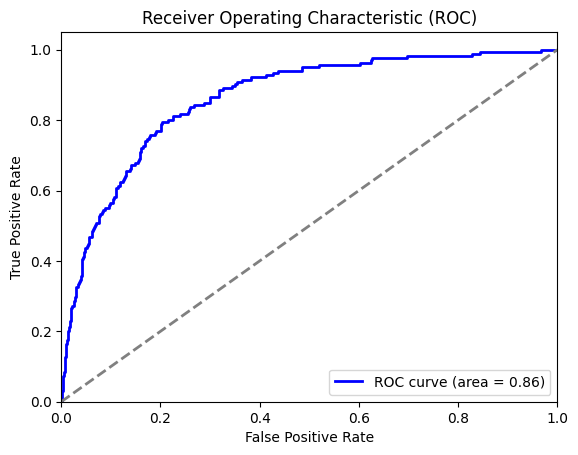

Run ID: 40fc747622a146179a26c1e8191c07c8
Accuracy: 0.8841
Confusion Matrix:
[[1117   12]
 [ 138   27]]
ROC AUC Score: 0.8621


Registered model 'DengueModel' already exists. Creating a new version of this model...
2024/09/15 14:06:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: DengueModel, version 4
Created version '4' of model 'estrella.default.denguemodel'.


In [0]:
import pandas as pd
import statsmodels.api as sm
from pyspark.sql import SparkSession
from pyspark.sql.functions import current_timestamp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import mlflow
import mlflow.pyfunc
import numpy as np

# Crear una sesión de Spark
spark = SparkSession.builder \
    .appName("LogisticRegressionExample") \
    .getOrCreate()

# Configurar el acceso a Azure Data Lake Storage (ADLS)
account = "stmd01estrella"
key = "aO0SDuNHT7RQFaCaMN+YiW2R5829YhVT2GtOey+Utaw611i/J+b300eZMYSAfVbNeMz8U/X94aVC+AStgeMROw=="
spark.conf.set(f"fs.azure.account.key.{account}.dfs.core.windows.net", key)

# Cargar el DataFrame de PySpark (ajusta según tu configuración)
# df = spark.read.csv("/ruta/a/tu/archivo.csv", header=True, inferSchema=True)

# Convertir el DataFrame de PySpark a pandas
pdf = df.toPandas()

# Definir las variables independientes y la variable dependiente
X = pdf[["dengue_TS", "dis_ciudad", "bio1_mean", "den_pob", "Alt_mean", "bio19_mean", "OrientNS", "bio15_mean"]]
y = pdf["dengue_SA"]

# Verificar si hay valores faltantes y manejarlos
print(X.isnull().sum())  # Muestra el número de valores faltantes por columna

# Imputar o eliminar valores faltantes si es necesario
X = X.fillna(0)  # Ejemplo de imputación con 0

# Añadir una constante a las variables independientes para incluir el intercepto en el modelo
X = sm.add_constant(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar la ruta absoluta para el experimento en MLflow
experiment_path = "/Workspace/Users/estrellasicardi@udelar409.onmicrosoft.com/DengueLogReg7"
model_name = "DengueModel"

# Establecer el experimento en MLflow
mlflow.set_experiment(experiment_path)

# Finalizar cualquier ejecución activa previa
mlflow.end_run()
# Ruta del contenedor en ADLS
gold_container_path = f"abfss://gold@{account}.dfs.core.windows.net/Modelo_dengue/"
# Iniciar una nueva ejecución en MLflow
with mlflow.start_run() as run:
    # Ajustar el modelo de regresión logística
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    # Mostrar el resumen del modelo
    print(result.summary())

    # Crear una clase que envuelva el modelo de statsmodels para usar con mlflow.pyfunc
    class StatsmodelsWrapper(mlflow.pyfunc.PythonModel):
        def __init__(self, model):
            self.model = model

        def predict(self, context, model_input):
            # Convertir entrada en un DataFrame
            input_df = pd.DataFrame(model_input, columns=self.model.exog_names)
            input_df = sm.add_constant(input_df)
            # Realizar predicciones
            return self.model.predict(input_df)

    # Registrar el modelo en MLflow
    signature = mlflow.models.infer_signature(X_train, y_train)
    mlflow.pyfunc.log_model("model", python_model=StatsmodelsWrapper(result), signature=signature)

    # Realizar predicciones
    y_pred_prob = result.predict(X_test)
    y_pred = [1 if x > 0.5 else 0 for x in y_pred_prob]  # Convertir probabilidades en predicciones binarias

    # Medir el rendimiento del modelo
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Registrar métricas en MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("roc_auc", roc_auc)

    # Registrar la matriz de confusión como un artefacto
    with open("/tmp/confusion_matrix.txt", "w") as f:
        f.write(f"Confusion Matrix:\n{conf_matrix}")
    mlflow.log_artifact("/tmp/confusion_matrix.txt")

    # Graficar la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

    # Guardar los datos de entrenamiento en el contenedor gold con Spark y timestamp
    X_train_spark = spark.createDataFrame(X_train)
    X_train_spark = X_train_spark.withColumn("training_timestamp", current_timestamp())
    X_train_spark.write.format("delta").mode("overwrite").save(f"{gold_container_path}/datos_entrenamiento_delta")

    # Guardar los coeficientes del modelo en una tabla Spark
    coef_df = pd.DataFrame({
        'Variable': X_train.columns,
        'Coeficiente': result.params
    })
    coef_spark_df = spark.createDataFrame(coef_df)
    coef_spark_df.write.format("delta").mode("overwrite").save(f"{gold_container_path}/coeficientes_delta")

    # Imprimir información del run
    run_id = run.info.run_id
    print(f"Run ID: {run_id}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Guardar en el Model Registry de Workspace
    mlflow.register_model(f"runs:/{run_id}/model", model_name)


In [0]:
import pickle

# Guardar los coeficientes en un archivo Pickle
coef_pickle_path = "/tmp/modelo_coeficientes.pkl"
with open(coef_pickle_path, "wb") as f:
    pickle.dump(result.params.to_dict(), f)

# Registrar el archivo Pickle como un artefacto en MLflow
mlflow.log_artifact(coef_pickle_path)


Hago predicciones. Se calcula la performance nuevamente y se grafica curva ROC. Se observa que sigue teniendo un score parecido.

In [0]:
# Install openpyxl library
%pip install openpyxl


Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Configurar la ruta del archivo Pickle
pickle_path = "/tmp/modelo_coeficientes.pkl"

# Cargar el modelo desde el archivo Pickle
with open(pickle_path, "rb") as f:
    model_params = pickle.load(f)

# Verificar el contenido de model_params
print("Modelo cargado:", model_params)

# Asegúrate de que model_params es un array NumPy, si es un diccionario, convierte sus valores en un array
if isinstance(model_params, dict):
    model_params = np.array(list(model_params.values()))

# Crear una función para realizar predicciones utilizando los coeficientes cargados
def predict_from_params(params, X):
    """
    Realiza predicciones usando los coeficientes del modelo.
    :param params: Coeficientes del modelo.
    :param X: Datos de entrada.
    :return: Predicciones del modelo.
    """
    X_array = X.values  # Convertir DataFrame a NumPy array
    X_array = sm.add_constant(X_array)  # Asegurarse de que la constante está incluida
    predictions = np.dot(X_array, params)  # Calcular las predicciones
    return predictions

# Leer datos desde el archivo Excel en Databricks
file_path = "/Workspace/Users/estrellasicardi@udelar409.onmicrosoft.com/datos_actualizados.xlsx"
excel_data = pd.read_excel(file_path)

# Preparar los datos para la predicción
data_for_prediction = excel_data[[
    "dengue_TS", "dis_ciudad", "bio1_mean", "den_pob", "Alt_mean", "bio19_mean", "OrientNS", "bio15_mean"
]].copy()  # Use copy to avoid SettingWithCopyWarning

# Realizar predicciones
predictions = predict_from_params(model_params, data_for_prediction)

# Convertir las predicciones a probabilidades usando la función sigmoide
probabilities = 1 / (1 + np.exp(-predictions))

# Convertir a clase binaria (asumiendo umbral de 0.5)
binary_predictions = [1 if p > 0.5 else 0 for p in probabilities]

# Mostrar las predicciones
print(binary_predictions)


Modelo cargado: {'const': -7.007908647285582, 'dengue_TS': 5.026422512012203, 'dis_ciudad': -2.1772346022101242e-05, 'bio1_mean': 0.01766712196349804, 'den_pob': 0.0022706774709543268, 'Alt_mean': 0.0005571884016154688, 'bio19_mean': -0.0008489432116791073, 'OrientNS': 0.011096206095702568, 'bio15_mean': -0.006298072310553501}
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

Modelo cargado: {'const': -7.007908647285582, 'dengue_TS': 5.026422512012203, 'dis_ciudad': -2.1772346022101242e-05, 'bio1_mean': 0.01766712196349804, 'den_pob': 0.0022706774709543268, 'Alt_mean': 0.0005571884016154688, 'bio19_mean': -0.0008489432116791073, 'OrientNS': 0.011096206095702568, 'bio15_mean': -0.006298072310553501}
Advertencia: Las predicciones contienen NaNs. Se reemplazarán por 0.
Accuracy: 0.8917
Confusion Matrix:
[[5629   77]
 [ 623  137]]
ROC AUC Score: 0.8496


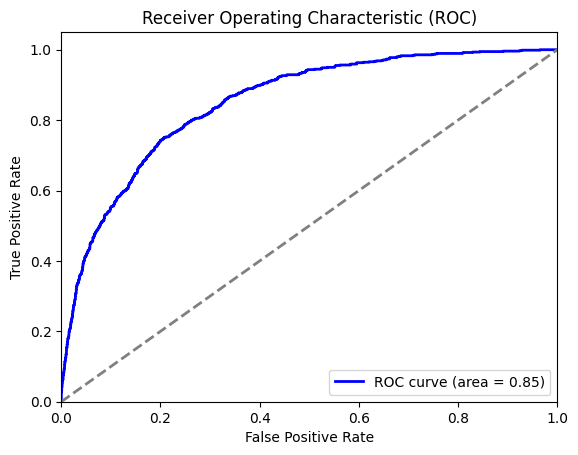

In [0]:
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Configurar la ruta del archivo Pickle
pickle_path = "/tmp/modelo_coeficientes.pkl"

# Cargar el modelo desde el archivo Pickle
with open(pickle_path, "rb") as f:
    model_params = pickle.load(f)

# Verificar el contenido de model_params
print("Modelo cargado:", model_params)

# Asegúrate de que model_params es un array NumPy, si es un diccionario, convierte sus valores en un array
if isinstance(model_params, dict):
    model_params = np.array(list(model_params.values()))

# Crear una función para realizar predicciones utilizando los coeficientes cargados
def predict_from_params(params, X):
    """
    Realiza predicciones usando los coeficientes del modelo.
    :param params: Coeficientes del modelo.
    :param X: Datos de entrada.
    :return: Predicciones del modelo.
    """
    X_array = X.values  # Convertir DataFrame a NumPy array
    X_array = sm.add_constant(X_array)  # Asegurarse de que la constante está incluida
    predictions = np.dot(X_array, params)  # Calcular las predicciones
    return predictions

# Leer datos desde el archivo Excel en Databricks
file_path = "/Workspace/Users/estrellasicardi@udelar409.onmicrosoft.com/datos_actualizados.xlsx"
excel_data = pd.read_excel(file_path)

# Preparar los datos para la predicción
data_for_prediction = excel_data[[
    "dengue_TS", "dis_ciudad", "bio1_mean", "den_pob", "Alt_mean", "bio19_mean", "OrientNS", "bio15_mean"
]].copy()  # Use copy to avoid SettingWithCopyWarning

# Si tienes una columna de etiquetas reales (por ejemplo, 'dengue_SA') en el archivo, sepárala
# y asegúrate de que esté disponible para las métricas.
y_true = excel_data["dengue_SA"]  # Asegúrate de tener la etiqueta verdadera en el DataFrame

# Verificar y manejar NaNs en y_true y data_for_prediction
if y_true.isna().any():
    print("Advertencia: y_true contiene NaNs. Se eliminarán las filas con NaNs en y_true.")
    valid_indices = ~y_true.isna()
    y_true = y_true[valid_indices]
    data_for_prediction = data_for_prediction[valid_indices]

# Realizar predicciones
predictions = predict_from_params(model_params, data_for_prediction)

# Verificar y manejar NaNs en las predicciones
if np.isnan(predictions).any():
    print("Advertencia: Las predicciones contienen NaNs. Se reemplazarán por 0.")
    predictions = np.nan_to_num(predictions)

# Convertir las predicciones a probabilidades usando la función sigmoide
probabilities = 1 / (1 + np.exp(-predictions))

# Verificar y manejar NaNs en las probabilidades
if np.isnan(probabilities).any():
    print("Advertencia: Las probabilidades contienen NaNs. Se reemplazarán por 0.")
    probabilities = np.nan_to_num(probabilities)

# Convertir a clase binaria (asumiendo umbral de 0.5)
binary_predictions = [1 if p > 0.5 else 0 for p in probabilities]

# Medir el rendimiento del modelo
accuracy = accuracy_score(y_true, binary_predictions)
conf_matrix = confusion_matrix(y_true, binary_predictions)
roc_auc = roc_auc_score(y_true, probabilities)

# Registrar métricas en MLflow
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_true, probabilities)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
